# Importing Libraries and Loading Dataset

In [ ]:
# Import core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import scikit-learn tools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



In [ ]:
# Install kaggle
!pip install kaggle



In [ ]:
# Upload the kaggle.json file
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"alaashorbaji","key":"dd3b4b8c063a3d84fb12e92072782756"}'}

In [ ]:
# ✅ Step 3: Move kaggle.json and set permissions
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
# ✅ Download the dataset
!kaggle datasets download -d fedesoriano/stroke-prediction-dataset

# ✅ Unzip the file
!unzip stroke-prediction-dataset.zip


Dataset URL: https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset
License(s): copyright-authors
  0% 0.00/67.4k [00:00<?, ?B/s]
100% 67.4k/67.4k [00:00<00:00, 116MB/s]
Archive:  stroke-prediction-dataset.zip
  inflating: healthcare-dataset-stroke-data.csv  


# Data Reading

In [ ]:
import pandas as pd

# ✅ Load the dataset
df = pd.read_csv("/content/healthcare-dataset-stroke-data.csv")

# ✅ Preview the data
df.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# Exploratory Data Analysis (EDA)

## Overview of the Dataset

In [ ]:
# Check data structure and types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [ ]:

# Summary statistics
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [ ]:
# Check for missing values
df.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


## Target Variable Distribution (Stroke Cases)

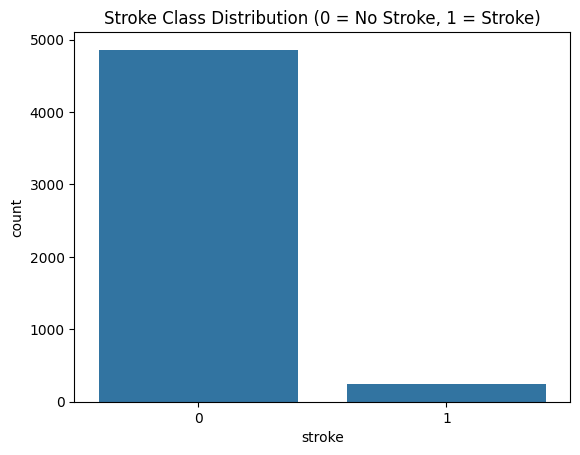

Stroke Class Percentages:
stroke
0    95.127202
1     4.872798
Name: proportion, dtype: float64


In [ ]:
# Countplot for stroke distribution
sns.countplot(data=df, x='stroke')
plt.title("Stroke Class Distribution (0 = No Stroke, 1 = Stroke)")
plt.show()

# Percentage of each class
stroke_percentage = df['stroke'].value_counts(normalize=True) * 100
print("Stroke Class Percentages:")
print(stroke_percentage)


## Unique Values in Categorical Columns

In [ ]:
# Print unique values for each categorical column
categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
for col in categorical_cols:
    print(f"{col}: {df[col].unique()}")


gender: ['Male' 'Female' 'Other']
ever_married: ['Yes' 'No']
work_type: ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Residence_type: ['Urban' 'Rural']
smoking_status: ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


## Categorical Feature Distributions

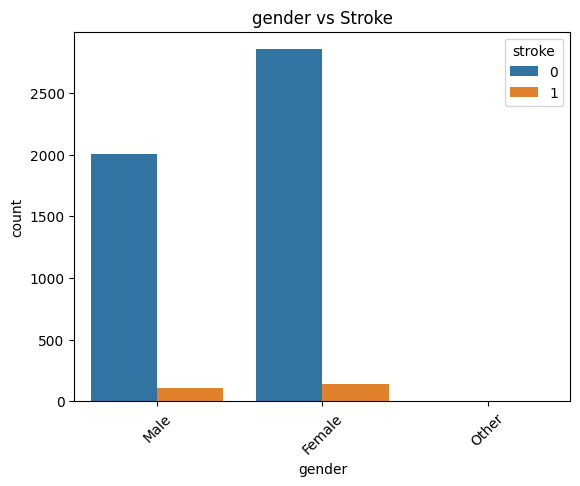

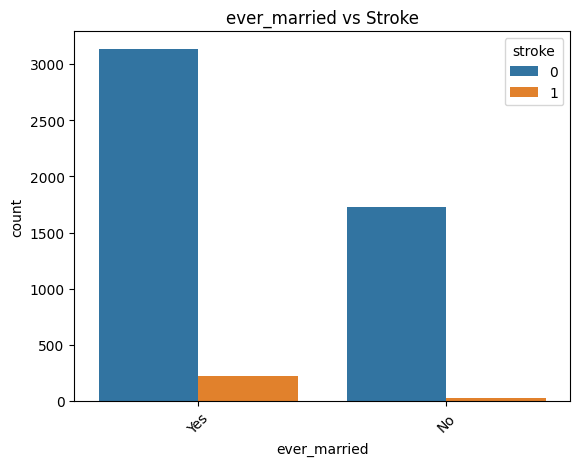

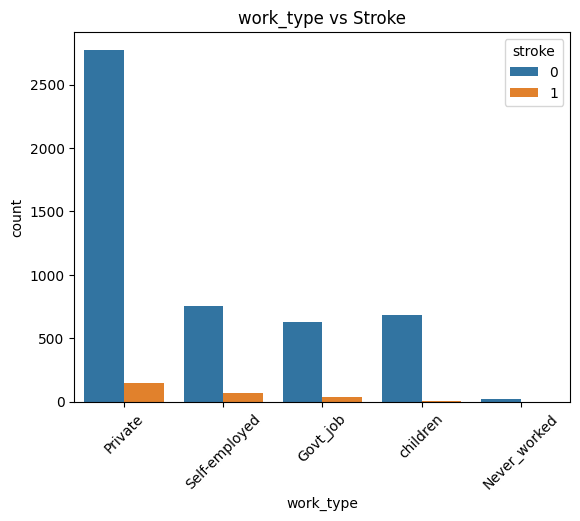

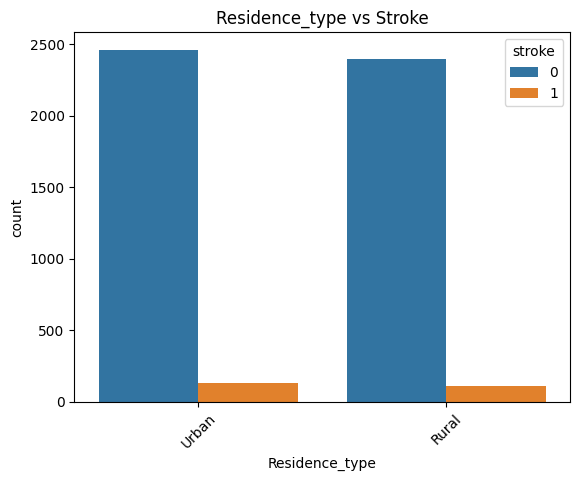

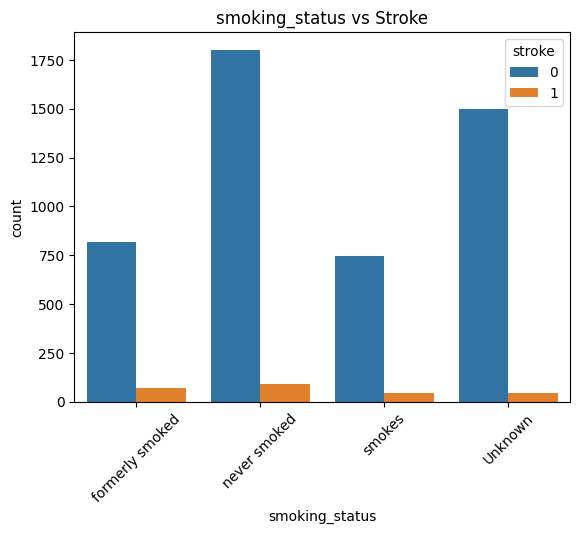

In [ ]:
# Countplots for categorical features split by stroke class
for col in categorical_cols:
    sns.countplot(data=df, x=col, hue='stroke')
    plt.title(f"{col} vs Stroke")
    plt.xticks(rotation=45)
    plt.show()


## Numerical Feature Distributions (Histograms)

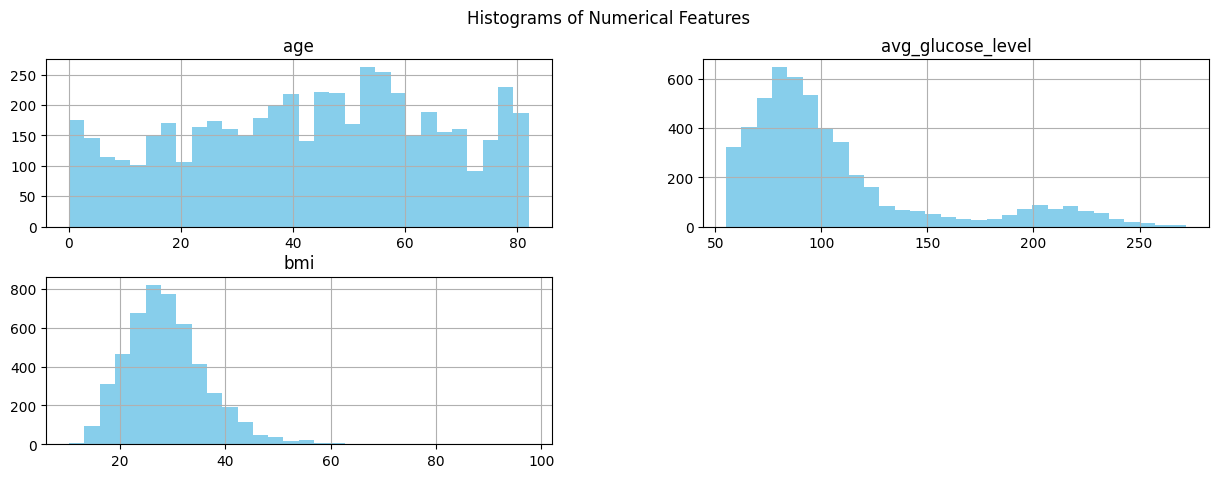

In [ ]:
# Histograms of numerical features
numerical_cols = ['age', 'avg_glucose_level', 'bmi']
df[numerical_cols].hist(bins=30, figsize=(15, 5), color='skyblue')
plt.suptitle("Histograms of Numerical Features")
plt.show()


## Boxplots of Numerical Features by Stroke Class

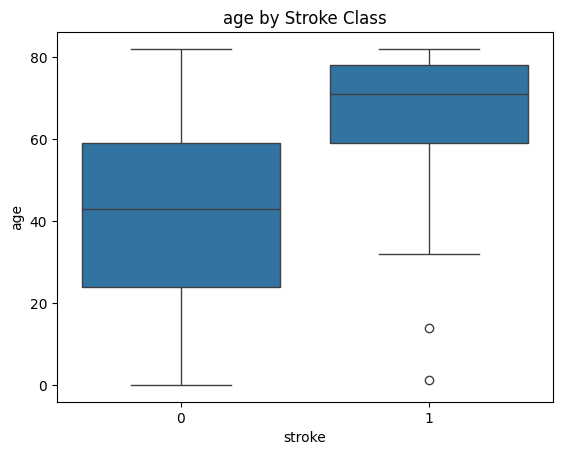

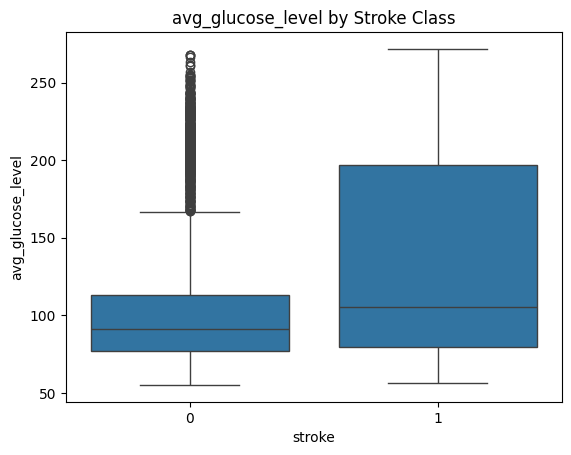

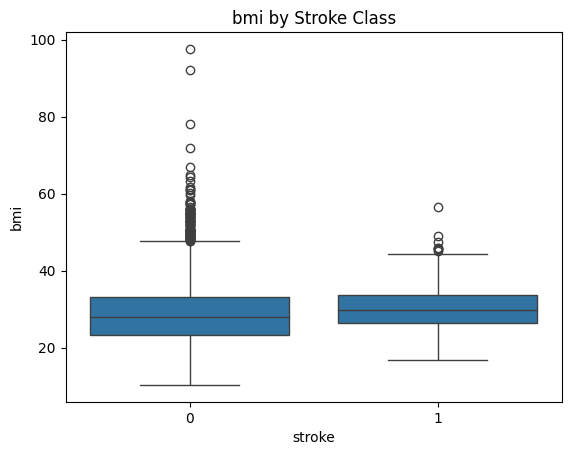

In [ ]:
# Boxplots to check differences between stroke/no-stroke
for col in numerical_cols:
    sns.boxplot(x='stroke', y=col, data=df)
    plt.title(f"{col} by Stroke Class")
    plt.show()


## Correlation Heatmap

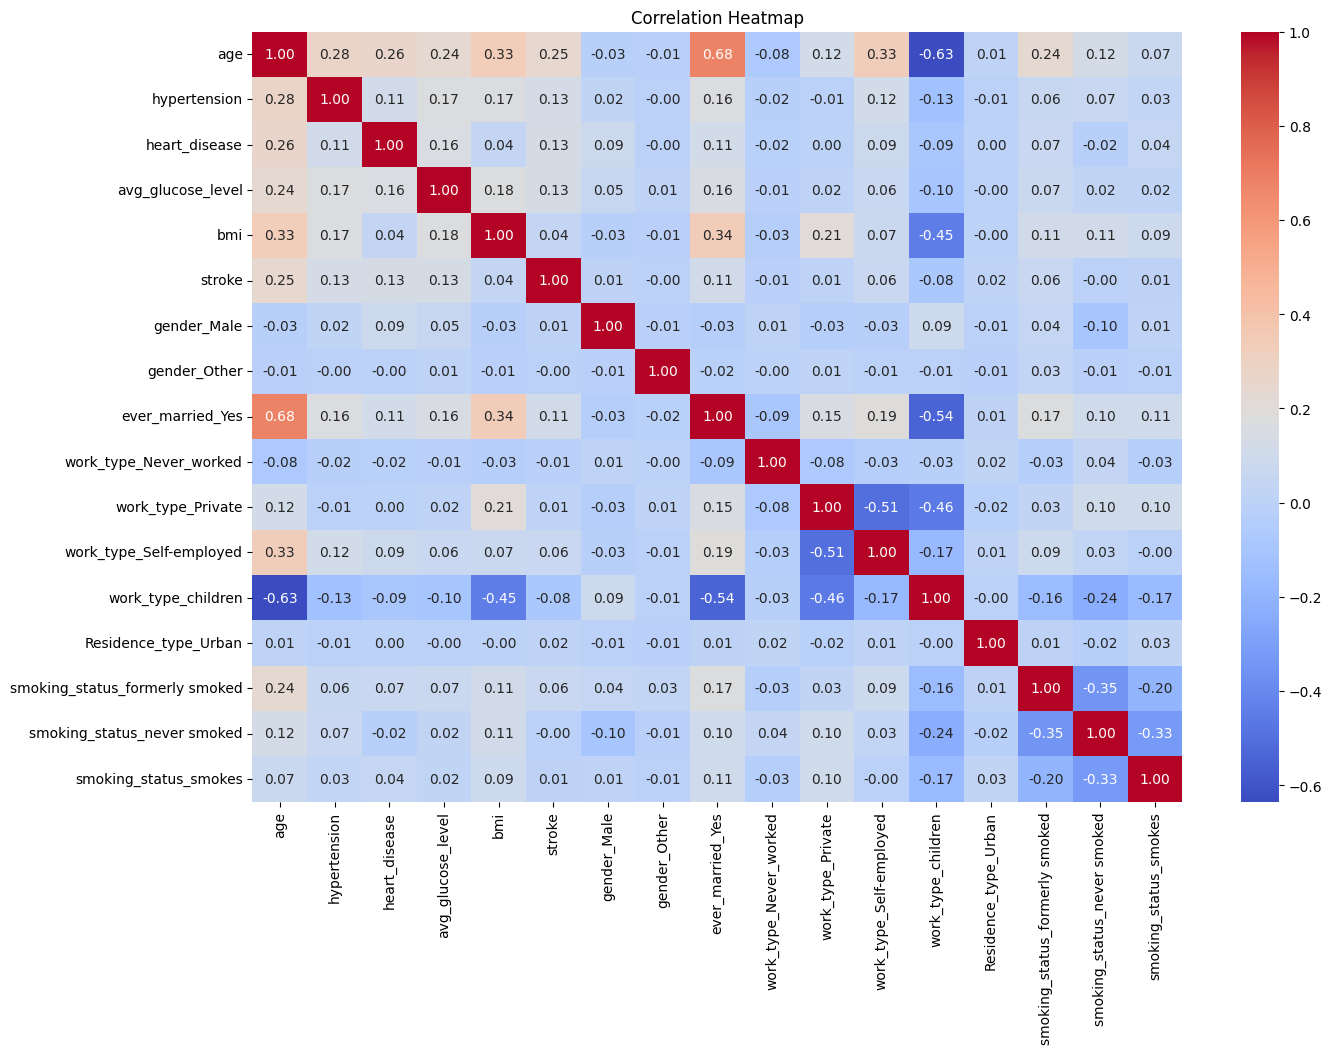

In [ ]:
# Encode categorical variables for correlation analysis
df_corr = pd.get_dummies(df.drop('id', axis=1), drop_first=True)

# Plot correlation heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(df_corr.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


## Pairplot for Key Variables (Optional, Slow for Large Datasets)

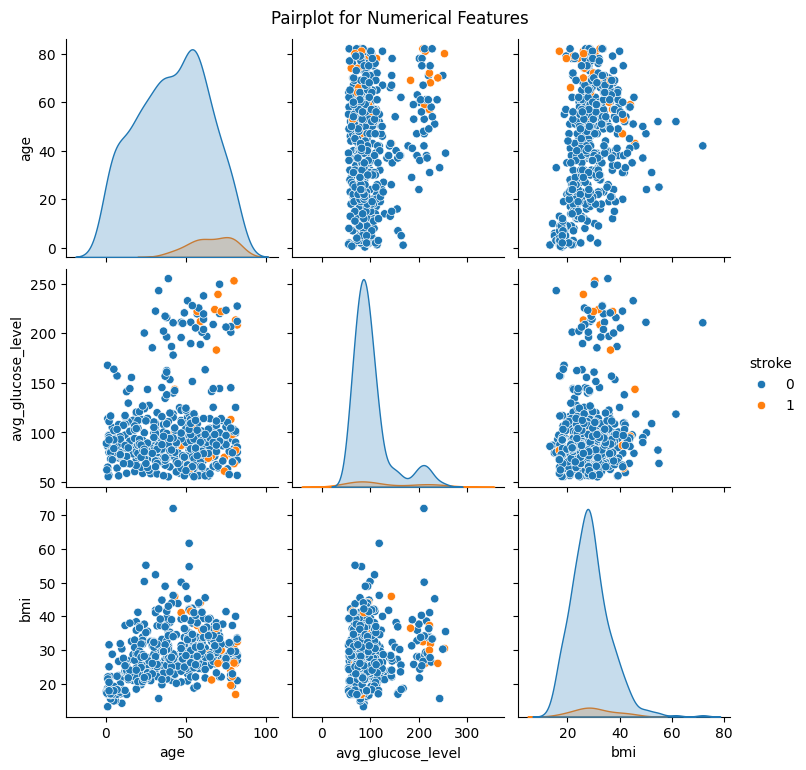

In [ ]:
# Sample for faster visualization
sample_df = df.sample(n=500, random_state=42)

# Pairplot for selected features
sns.pairplot(sample_df, hue='stroke', vars=['age', 'avg_glucose_level', 'bmi'])
plt.suptitle("Pairplot for Numerical Features", y=1.02)
plt.show()


# Feature Relationship to Stroke using GroupBy & Mean Plots

## Numerical Features (Mean Comparison)

In [ ]:
# Compare means of numerical features between stroke classes
numerical_cols = ['age', 'avg_glucose_level', 'bmi']

# Group by stroke and calculate means
grouped_means = df.groupby('stroke')[numerical_cols].mean()
print("Mean values by stroke class:")
print(grouped_means.T)


Mean values by stroke class:
stroke                      0           1
age                 41.971545   67.728193
avg_glucose_level  104.795513  132.544739
bmi                 28.823064   30.471292


## Barplots for Visual Comparison

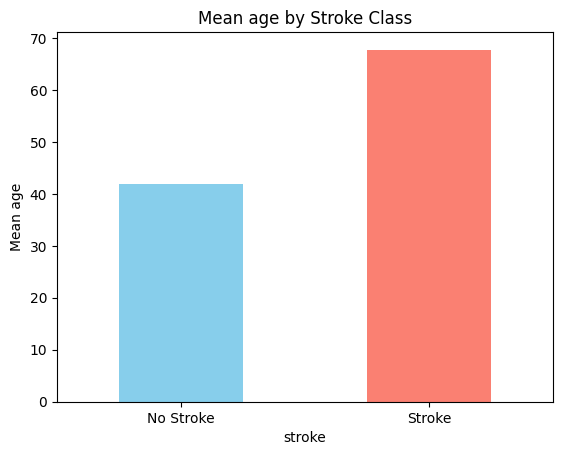

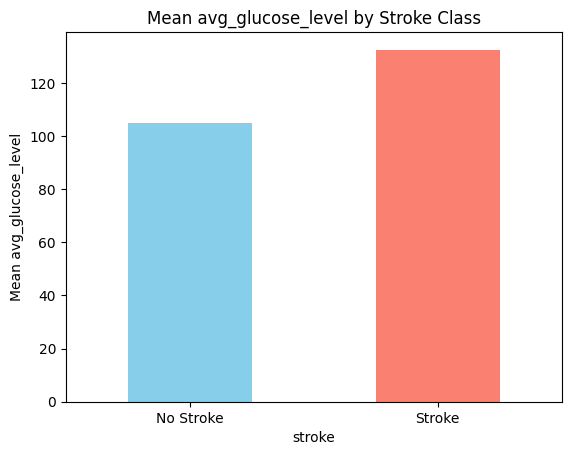

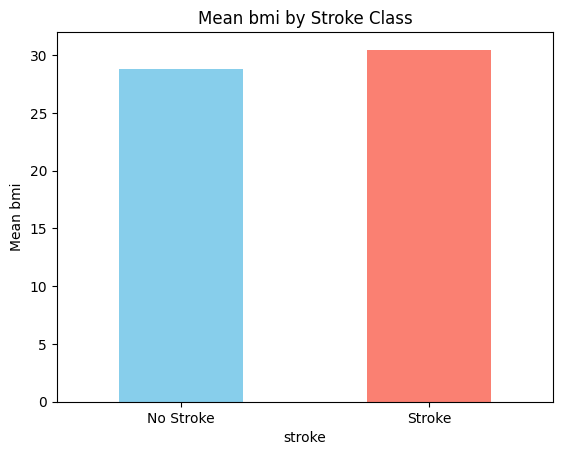

In [ ]:
# Plot mean values of each numerical feature for stroke vs no stroke
for col in numerical_cols:
    mean_values = df.groupby('stroke')[col].mean()
    mean_values.plot(kind='bar', color=['skyblue', 'salmon'])
    plt.title(f"Mean {col} by Stroke Class")
    plt.ylabel(f"Mean {col}")
    plt.xticks([0, 1], ['No Stroke', 'Stroke'], rotation=0)
    plt.show()


## Categorical Features (Stroke Rate per Category)


Stroke rate by gender:
gender
Male      0.051064
Female    0.047094
Other     0.000000
Name: stroke, dtype: float64


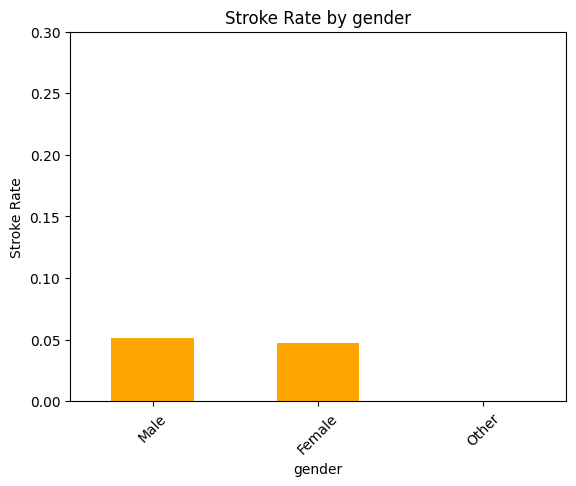


Stroke rate by ever_married:
ever_married
Yes    0.065613
No     0.016505
Name: stroke, dtype: float64


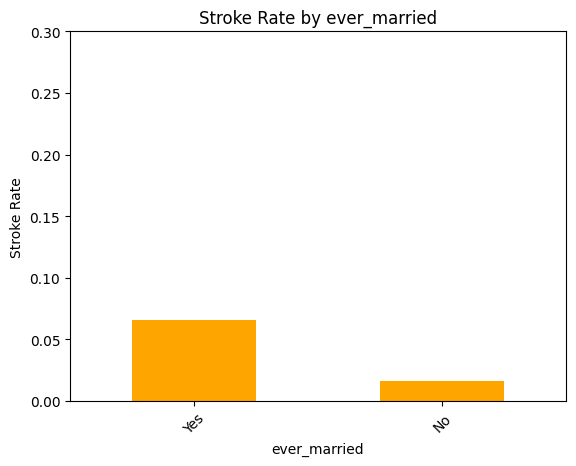


Stroke rate by work_type:
work_type
Self-employed    0.079365
Private          0.050940
Govt_job         0.050228
children         0.002911
Never_worked     0.000000
Name: stroke, dtype: float64


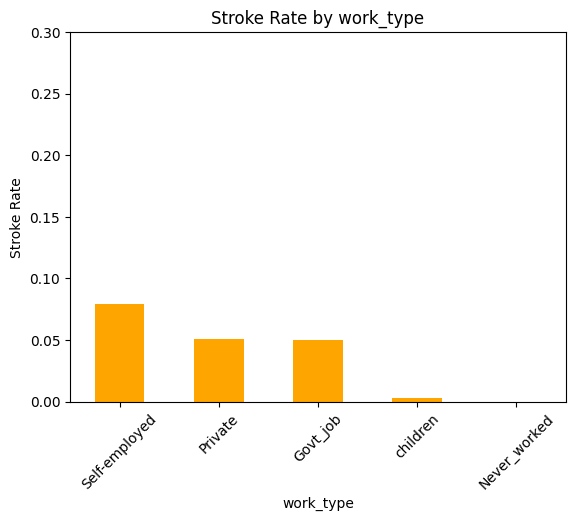


Stroke rate by Residence_type:
Residence_type
Urban    0.052003
Rural    0.045346
Name: stroke, dtype: float64


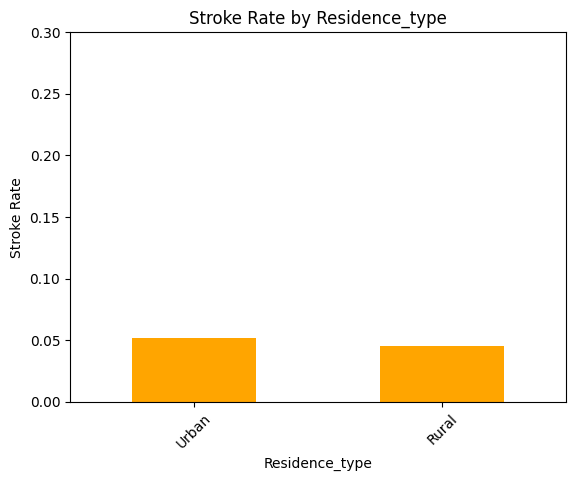


Stroke rate by smoking_status:
smoking_status
formerly smoked    0.079096
smokes             0.053232
never smoked       0.047569
Unknown            0.030440
Name: stroke, dtype: float64


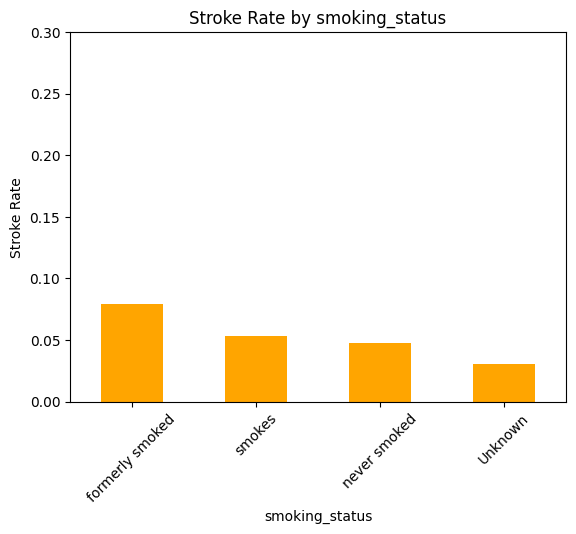

In [ ]:
# Calculate stroke rate (mean) for each category in each categorical feature
categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

for col in categorical_cols:
    stroke_rate = df.groupby(col)['stroke'].mean().sort_values(ascending=False)
    print(f"\nStroke rate by {col}:")
    print(stroke_rate)

    # Plot stroke rate by category
    stroke_rate.plot(kind='bar', color='orange')
    plt.title(f"Stroke Rate by {col}")
    plt.ylabel("Stroke Rate")
    plt.xticks(rotation=45)
    plt.ylim(0, 0.3)
    plt.show()


# Feature Engineering

## Drop Irrelevant Columns

In [ ]:
# Drop 'id' column (not useful for prediction)
df.drop('id', axis=1, inplace=True)


## Handle Missing Values

In [ ]:
# Check for missing values again
print("Missing values before cleaning:")
print(df.isnull().sum())

# Fill missing 'bmi' values with the median
df['bmi'] = df['bmi'].fillna(df['bmi'].median())

# Confirm that missing values are handled
print("\nMissing values after cleaning:")
print(df.isnull().sum())


Missing values before cleaning:
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Missing values after cleaning:
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


## Simplify / Clean Categories

In [ ]:
#Fix Inconsistent or Rare Values
# Show unique values in 'gender'
print(df['gender'].value_counts())

# Remove 'Other' category from gender
df = df[df['gender'] != 'Other']


gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64


In [ ]:
#Combine similar or unclear values (optional)

In [ ]:
# Optionally group 'never smoked' and 'Unknown' in 'smoking_status'
df['smoking_status'] = df['smoking_status'].replace('Unknown', 'never smoked')


## Encode Categorical Variables

In [ ]:
# Use one-hot encoding for all categorical features (drop_first=True to avoid dummy trap)
df_encoded = pd.get_dummies(df, drop_first=True)

# View the new encoded column names
df_encoded.columns


Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'stroke', 'gender_Male', 'ever_married_Yes', 'work_type_Never_worked',
       'work_type_Private', 'work_type_Self-employed', 'work_type_children',
       'Residence_type_Urban', 'smoking_status_never smoked',
       'smoking_status_smokes'],
      dtype='object')

## Separate Features and Target

In [ ]:
# Separate input features (X) and target (y)
X = df_encoded.drop('stroke', axis=1)
y = df_encoded['stroke']

## Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data (stratified to preserve class balance)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Check shapes
print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)


Training data shape: (4087, 14)
Test data shape: (1022, 14)


## Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit on training data and transform both train and test sets
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Handling Class Imbalance with SMOTE

Why SMOTE?

The dataset is imbalanced (few stroke cases). SMOTE synthetically generates new samples from the minority class to balance the training data.



Apply SMOTE only to the training set, not test set!

In [ ]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE on training data
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Check class distribution after balancing
print("Class distribution after SMOTE:")
print(pd.Series(y_train_balanced).value_counts())


Class distribution after SMOTE:
stroke
0    3888
1    3888
Name: count, dtype: int64


Optional Visualization of Balanced Classes

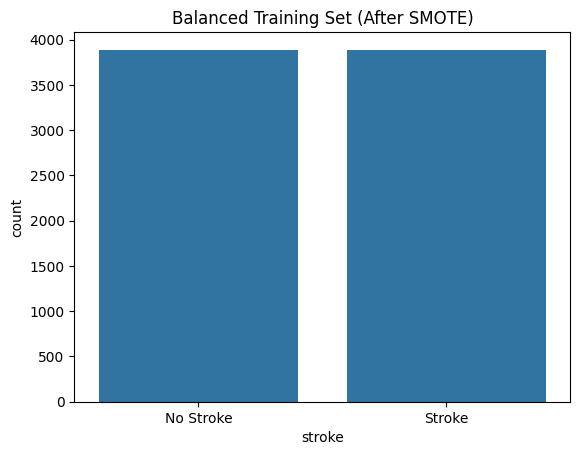

In [ ]:
sns.countplot(x=y_train_balanced)
plt.title("Balanced Training Set (After SMOTE)")
plt.xticks([0, 1], ['No Stroke', 'Stroke'])
plt.show()


# Model Training and Evaluation on Balanced Data

## Train and Evaluate Multiple Classifiers

In [ ]:
# Import all classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

# Import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define all models to train
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Support Vector Machine': SVC(),
    'Naive Bayes': GaussianNB(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}


## Loop Over Models and Print Reports

In [ ]:
# Train each model and evaluate on original test set
for name, model in models.items():
    model.fit(X_train_balanced, y_train_balanced)
    y_pred = model.predict(X_test)

    print(f"\n🔹 Model: {name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("-" * 60)



🔹 Model: Logistic Regression
Accuracy: 0.7407045009784736
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.74      0.84       972
           1       0.14      0.80      0.23        50

    accuracy                           0.74      1022
   macro avg       0.56      0.77      0.54      1022
weighted avg       0.94      0.74      0.81      1022

Confusion Matrix:
 [[717 255]
 [ 10  40]]
------------------------------------------------------------

🔹 Model: Decision Tree
Accuracy: 0.8708414872798435
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.91      0.93       972
           1       0.07      0.14      0.10        50

    accuracy                           0.87      1022
   macro avg       0.51      0.52      0.51      1022
weighted avg       0.91      0.87      0.89      1022

Confusion Matrix:
 [[883  89]
 [ 43   7]]
-----------------------------------------

## Compare Accuracies in a Barplot

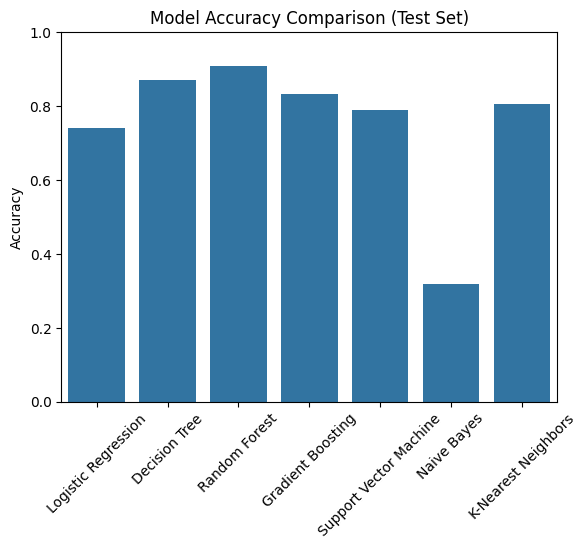

In [ ]:
# Collect accuracy scores for each model
model_scores = {}
for name, model in models.items():
    y_pred = model.predict(X_test)
    model_scores[name] = accuracy_score(y_test, y_pred)

# Plot comparison
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x=list(model_scores.keys()), y=list(model_scores.values()))
plt.xticks(rotation=45)
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison (Test Set)")
plt.ylim(0, 1)
plt.show()
